In [1]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
from scipy.constants import lambda2nu, nu2lambda, c
import os
import imp
import matplotlib.pyplot as plt
import sys

#windows path
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\') 
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')

#linux path
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))


In [87]:
fdtd = lumapi.FDTD(filename= 'Y_Branch.fsp')

## Parameters

In [29]:
w1 = 0.5e-6
w2 = 0.5e-6
w3 = 0.6e-6
w4 = 0.7e-6
w5 = 0.9e-6
w6 = 1.26e-6
w7 = 1.4e-6
w8 = 1.4e-6
w9 = 1.4e-6
w10 = 1.4e-6
w11 = 1.31e-6
w12 = 1.2e-6
w13 = 1.2e-6

w = 2/12*1e-6
height = 0.22e-6
material_core = 'Si (Silicon) - Palik'
material_subs = 'SiO2 (Glass) - Palik'

## DEFINING THE GEOMETRY IN THE LUMERICAL FDTD INTERFACE BY PYTHON API

In [30]:
# this script defines the main geometry of the Y_branch that is in the reference
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

fdtd.addrect()
fdtd.set({'name':'rect_1',
'x':0,
'x span':w,
'y':0,
'y span':w1,
'z':0,
'z span':height,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper1',
'x':w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w2,
'width_r':w3,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper2',
'x':2*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w3,
'width_r':w4,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper3',
'x':3*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w4,
'width_r':w5,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper4',
'x':4*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w5,
'width_r':w6,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper5',
'x':5*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w6,
'width_r':w7,
'len':w,
'material':material_core})


fdtd.addrect()
fdtd.set({'name':'rect_2',
'x':7*w,
'x span':3*w,
'y':0,
'y span':w7,
'z':0,
'z span':height,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper6',
'x':9*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w10,
'width_r':w11,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper7',
'x':10*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w11,
'width_r':w12,
'len':w,
'material':material_core})

fdtd.addrect()
fdtd.set({'name':'rect_3',
'x':11*w,
'x span':w,
'y':0,
'y span':w13,
'z':0,
'z span':height,
'material':material_core})

fdtd.addrect()
fdtd.set({'name':'rect_start',
'x min':-w/2 - 1e-6,
'x max':-w/2,
'y':0,
'y span':w1,
'z':0,
'z span':height,
'material':material_core})

In [31]:
# as we can see the outputs are very close so we have to put some bends in order to increase the size of the ports
xspan_bend = 4e-6
yspan_bend = 2e-6

fdtd.addobject('s_bend_wg')
fdtd.set({
'name':'bend_up',
'x':11*w+w/2,
'y':0.35e-6,
'z':0,
'base angle':90,
'base width':0.5e-6,
'x span':xspan_bend,
'y span':yspan_bend,
'base height':height
})

fdtd.addobject('s_bend_wg')
fdtd.set({
'first axis':'y',
'rotation 1':180})

fdtd.set({'name':'bend_down',
'x':11*w + w/2 + xspan_bend,
'y':-0.35e-6 - yspan_bend,
'z':0,
'base angle':90,
'base width':0.5e-6,
'x span':xspan_bend,
'y span':yspan_bend,
'base height':height})


In [32]:
#creating some rects to extend our simulation region
fdtd.addrect()
fdtd.set({
'name':'rect_up',
'x':11*w + w/2 + xspan_bend + 0.5e-6,
'x span':1e-6,
'y':0.35e-6 + yspan_bend,
'y span':0.5e-6,
'z':0,
'z span':height,
'material':material_core
})

fdtd.addrect()
fdtd.set({
'name':'rect_down',
'x':11*w + w/2 + xspan_bend + 0.5e-6,
'x span':1e-6,
'y':-0.35e-6 - yspan_bend,
'y span':0.5e-6,
'z':0,
'z span':height,
'material':material_core
})

In [88]:
fdtd.switchtolayout()
fdtd.select('FDTD')
fdtd.delete()
fdtd.select('monitor')
fdtd.delete()

mesh = 5
nof = 500 ## number of frequency points

fdtd.addfdtd()
fdtd.set({'x min':-w/2 - 0.5e-6,
'x max':11*w + w/2 + xspan_bend + 0.75e-6,
'y':0,
'y span':9e-6,
'z':0,
'z span':4e-6,
'simulation time':1250e-15,
'mesh accuracy':mesh,
'background material':material_subs})
## the boundary condition is PML

fdtd.addport()
fdtd.set({
'x':-w/2,
'y':0,
'y span':4e-6,
'z':0,
'z span':4e-6
})

fdtd.addport()
fdtd.set({
'direction':'Backward',
'x':11*w + w/2 + xspan_bend + 0.5e-6,
'y':0.35e-6 + yspan_bend,
'y span':4e-6,
'z':0,
'z span':4e-6
})

fdtd.addport()
fdtd.set({
'direction':'Backward',
'x':11*w + w/2 + xspan_bend + 0.5e-6,
'y':-0.35e-6 - yspan_bend,
'y span':4e-6,
'z':0,
'z span':4e-6
})

fdtd.select('FDTD::ports')
fdtd.set('monitor frequency points',nof)

fdtd.addprofile()
fdtd.set({
'x min':-w/2 - 0.5e-6,
'x max':11*w + w/2 + 0.5e-6,
'y':0,
'y span':4e-6,
'z':0,
'override global monitor settings':1,
'frequency points':100})

In [34]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

In [47]:
eField = np.squeeze(fdtd.getelectric("monitor"))

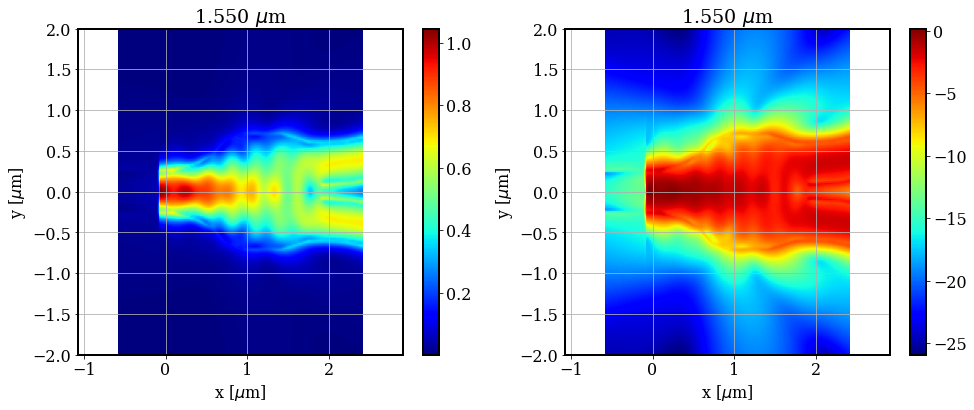

In [79]:
indxLambda = 36
x_efielf = fdtd.getdata("monitor", "x")
y_efielf = fdtd.getdata("monitor", "y")
lmbd = nu2lambda(fdtd.getdata("monitor", "f"))
xmin = 1e6*np.min(x_efielf);
xmax = 1e6*np.max(x_efielf);
ymin = 1e6*np.min(y_efielf);
ymax = 1e6*np.max(y_efielf);

fig1, axs1 = plt.subplots(1,2,figsize=(16,6))
im1 = axs1[0].imshow(np.rot90(np.sqrt(eField[:,:,indxLambda])), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im1, ax=axs1[0])
axs1[0].set_xlabel(r'x [$\mu$m]')
axs1[0].set_ylabel(r'y [$\mu$m]')
axs1[0].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[0].grid(True)
axs1[0].axis('equal')

im2 = axs1[1].imshow(10*np.log10(np.rot90(np.sqrt(eField[:,:,indxLambda]))), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im2, ax=axs1[1])
axs1[1].set_xlabel(r'x [$\mu$m]')
axs1[1].set_ylabel(r'y [$\mu$m]')
axs1[1].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[1].grid(True)
axs1[1].axis('equal')

fig1.tight_layout
plt.rcParams.update({'font.size': 16})

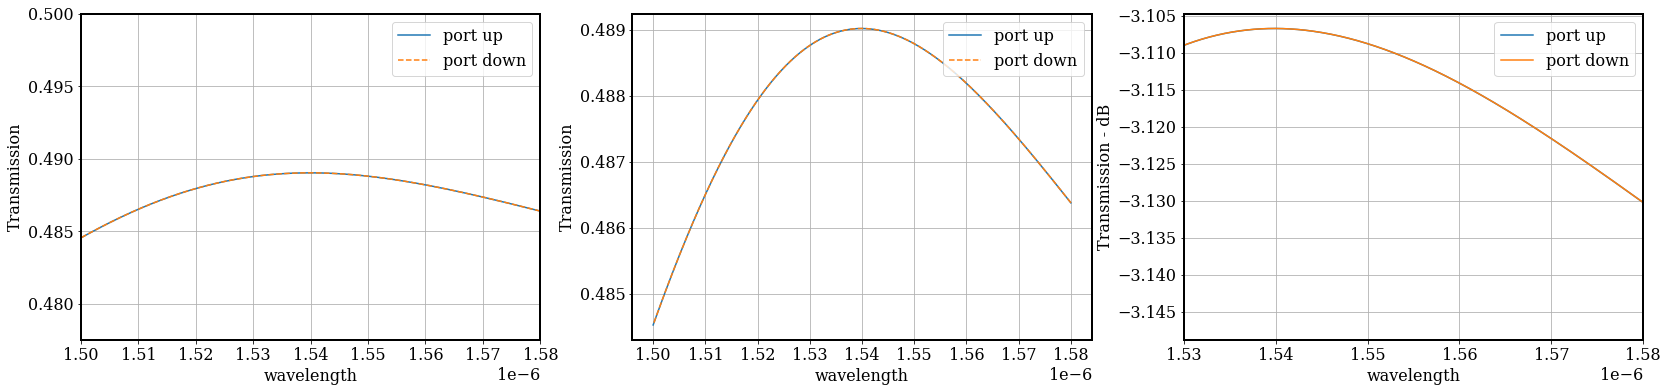

In [74]:
R1 = fdtd.getresult('FDTD::ports::port 1', 'T')
R2 = fdtd.getresult('FDTD::ports::port 2', 'T') ##port3 result
R3 = fdtd.getresult('FDTD::ports::port 3', 'T')

T1 = R1['T']
T2 = R2['T']
T3 = R3['T']

T1_db= 10*np.log10(R1['T'])
T2_db = 10*np.log10(R2['T'])
T3_db = 10*np.log10(R3['T'])
wavelength = R3['lambda']

figure, ax = plt.subplots(1, 3, figsize = (28,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(wavelength,T2, label = 'port up' )
ax[0].plot(wavelength,T3,'--', label = 'port down')
ax[0].set_xlabel('wavelength')
ax[0].set_ylabel('Transmission')
ax[0].set_ylim([0.4, 0.5])
ax[0].set_xlim([1.5e-6,1.58e-6])
ax[0].grid(True)
ax[0].legend(loc = 'upper right')

ax[1].plot(wavelength,T2, label = 'port up' )
ax[1].plot(wavelength,T3,'--', label = 'port down')
ax[1].set_xlabel('wavelength')
ax[1].set_ylabel('Transmission')
ax[0].set_ylim([0.4775, 0.5])
#ax[0].xlim([1.53e-6,1.565e-6])
ax[1].grid(True)
ax[1].legend(loc = 'upper right')

ax[2].plot(wavelength, T2_db, label = 'port up')
ax[2].plot(wavelength, T3_db, label = 'port down')
ax[2].set_xlabel('wavelength')
ax[2].set_ylabel('Transmission - dB')
#ax[2].set_ylim([0.4, 0.5])
ax[2].set_xlim([1.53e-6,1.58e-6])
ax[2].grid(True)
ax[2].legend(loc = 'upper right')

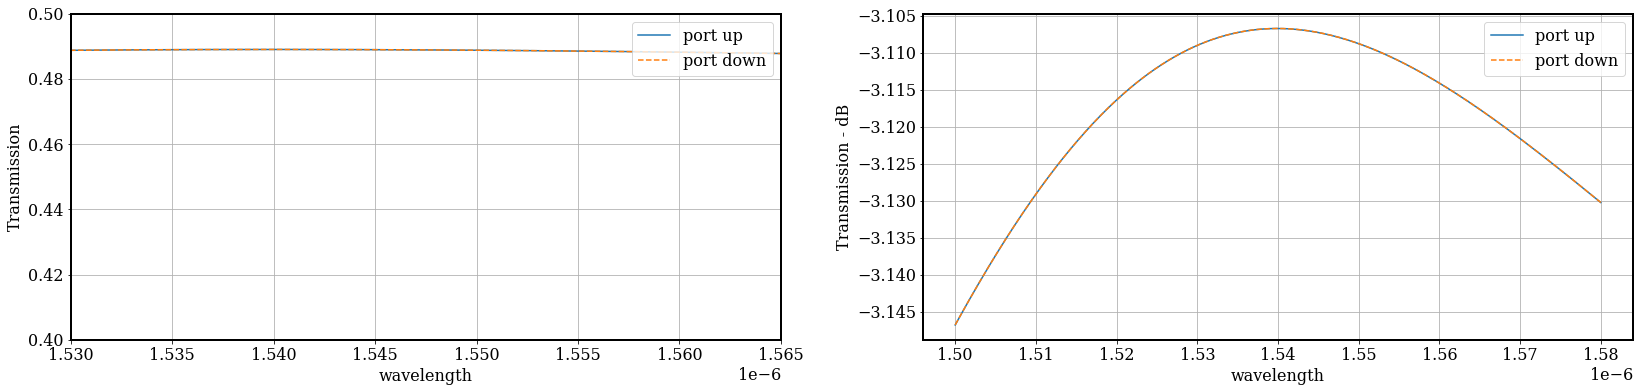

In [78]:
## ploting in the C band
figure, ax = plt.subplots(1, 2, figsize = (28,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(wavelength,T2, label = 'port up' )
ax[0].plot(wavelength,T3,'--', label = 'port down')
ax[0].set_xlabel('wavelength')
ax[0].set_ylabel('Transmission')
ax[0].set_ylim([0.4, 0.5])
ax[0].set_xlim([1.53e-6,1.565e-6])
ax[0].grid(True)
ax[0].legend(loc = 'upper right')

ax[1].plot(wavelength,T2_db, label = 'port up' )
ax[1].plot(wavelength,T3_db,'--', label = 'port down')
ax[1].set_xlabel('wavelength')
ax[1].set_ylabel('Transmission - dB')
#ax[0].set_ylim([0.4775, 0.5])
ax[0].set_xlim([1.53e-6,1.565e-6])
ax[1].grid(True)
ax[1].legend(loc = 'upper right')


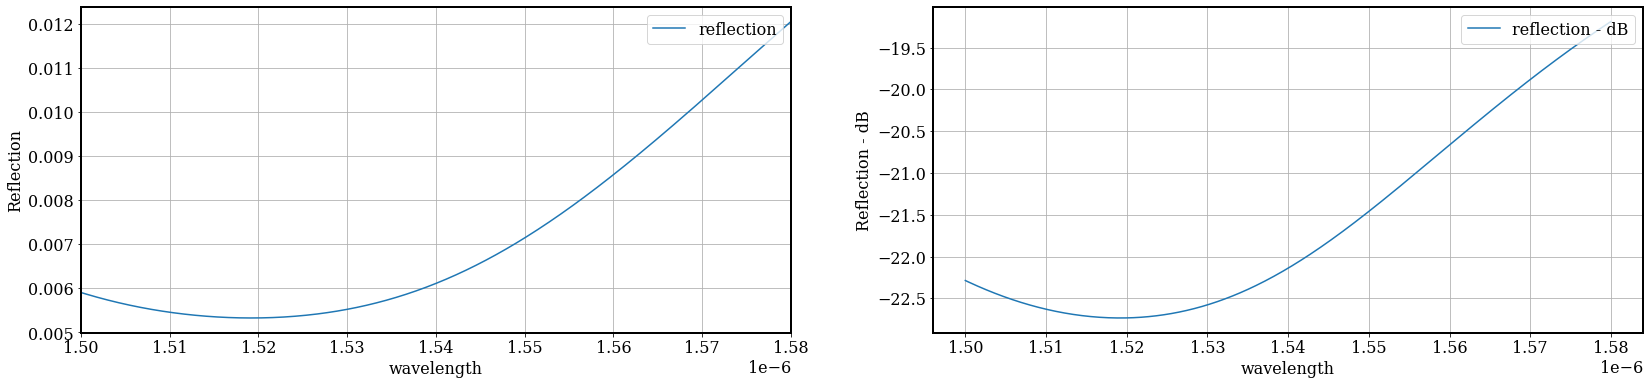

In [71]:
figure, ax = plt.subplots(1, 2, figsize = (28,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(wavelength,1 - T1, label = 'reflection' )
ax[0].set_xlabel('wavelength')
ax[0].set_ylabel('Reflection')
ax[0].set_xlim([1.5e-6,1.58e-6])
ax[0].grid(True)
ax[0].legend(loc = 'upper right')

ax[1].plot(wavelength,10*np.log10(1 - T1), label = 'reflection - dB' )
ax[1].set_xlabel('wavelength')
ax[1].set_ylabel('Reflection - dB')
ax[0].set_xlim([1.5e-6,1.58e-6])
ax[1].grid(True)
ax[1].legend(loc = 'upper right')

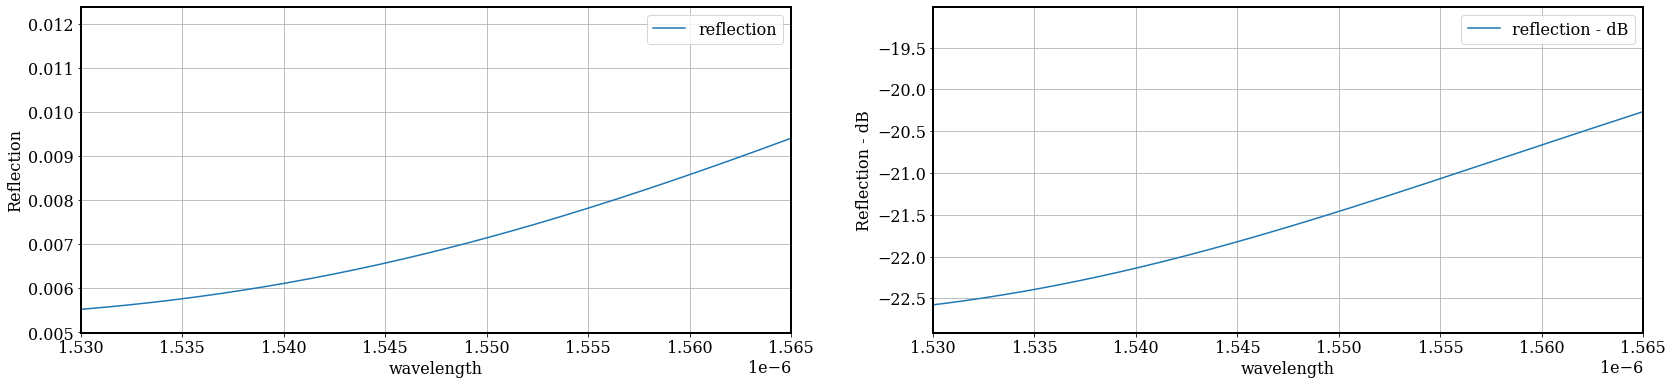

In [81]:
figure, ax = plt.subplots(1, 2, figsize = (28,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(wavelength,1 - T1, label = 'reflection' )
ax[0].set_xlabel('wavelength')
ax[0].set_ylabel('Reflection')
ax[0].set_xlim([1.53e-6,1.565e-6])
ax[0].grid(True)
ax[0].legend(loc = 'upper right')

ax[1].plot(wavelength,10*np.log10(1 - T1), label = 'reflection - dB' )
ax[1].set_xlabel('wavelength')
ax[1].set_ylabel('Reflection - dB')
ax[1].set_xlim([1.53e-6,1.565e-6])
ax[1].grid(True)
ax[1].legend(loc = 'upper right')

Text(0.5, 1.0, 'insertion loss - dB')

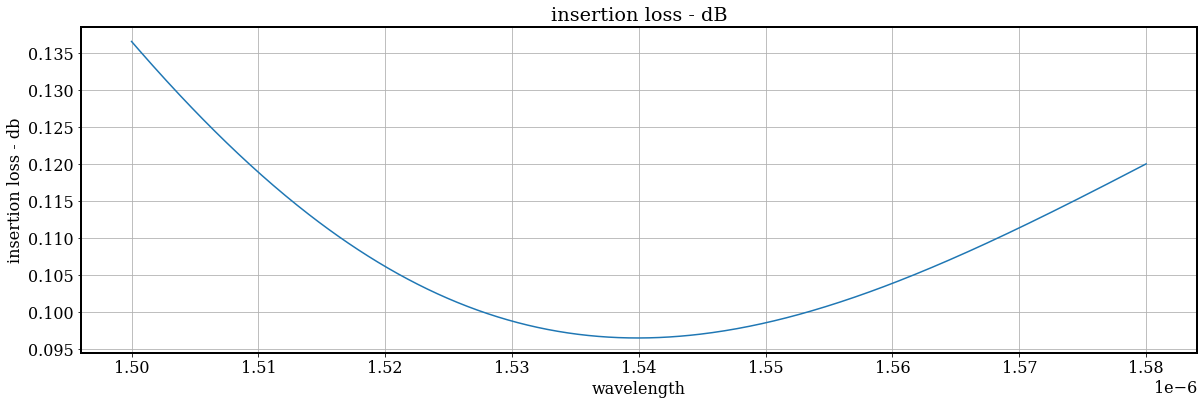

In [82]:
insertion_loss =-(10*np.log10(T2 + T3))

figure = plt.figure(figsize = (20,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

plt.plot(wavelength, insertion_loss)
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('insertion loss - db')
plt.title('insertion loss - dB')